In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy.optimize import fsolve
from scipy.stats import binom
import matplotlib.ticker as mtick

In [2]:
groupsize = 1 #3
mincpg = [1, 3,  5]

infile = '/Users/irffanalahi/Research/Research_update/in-silico/theoritical_model/depth_369x/BL14_atleast.2_top-1_singleCpG_final_assignedref_uniq.txt_result_final.txt_foldercollected_filev2.txt'

FP_col = 'FDR'
mNeu_col = 'mNeu_real'

adj = 0.95
out = infile+mNeu_col+"_only_"+'multi_reporters.pdf'

f1 = np.logspace(0,-6,num=1000)
r1 = [(16, 'A'), (23, 'B'), (29, 'C'), (31, 'D'), (47, 'E'), (100, 'F'), (110, 'G'), (216, 'H'), (340, 'I')]
#min_reporters = [1, 2, 3, 4, 5]
# d1 = 30

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/_discrete_distns.py:62: RuntimeWarning: floating point number truncated to an integer
  vals = special.bdtr(k, n, p)


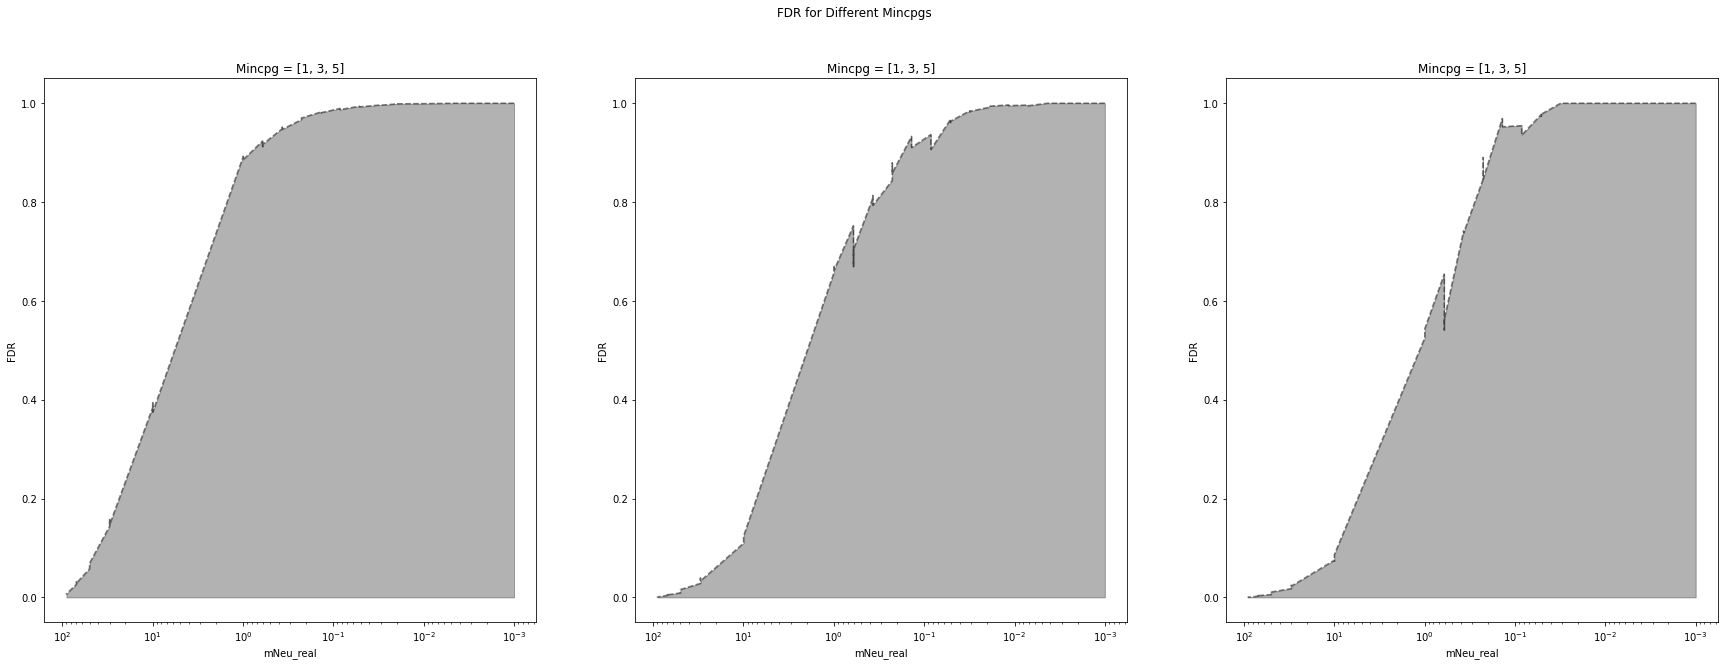

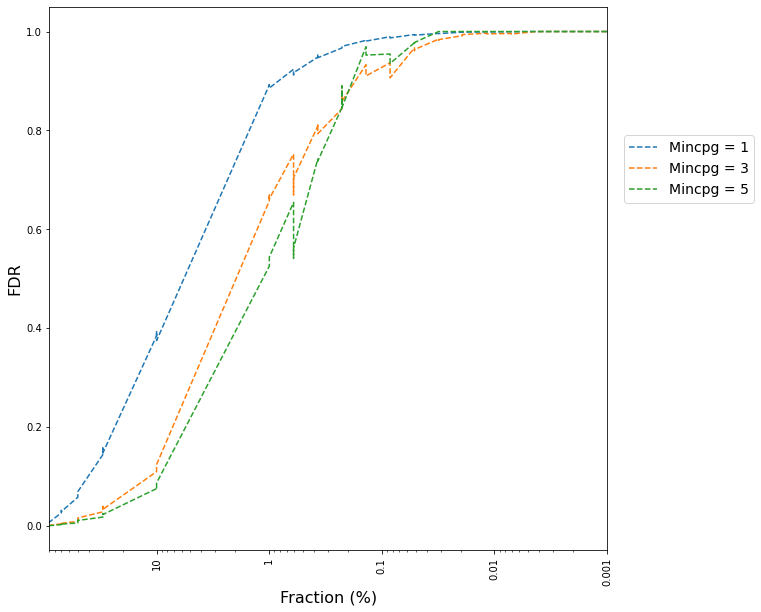

In [3]:
fig1, ax1 = plt.subplots(1, len(mincpg), figsize=(10 * len(mincpg), 10))
fig2, ax2 = plt.subplots(1, 1, figsize=(10, 10))

data = pd.read_csv(infile, sep='\t', index_col=0)
df = pd.DataFrame(data)

for j in range(len(mincpg)):
    val = mincpg[j]
    df_sub = df[df['mincpg'] == val].copy()
    df_sub['Index Number'] = [int(i.split('insilmix')[-1]) for i in df_sub.index]

    df_sub.sort_values(['Index Number'], inplace=True)
    df_sub = df_sub.drop('Index Number', axis=1)
    
    d1 = np.mean(np.array(df_sub['totalTestedread']))
    
    mNeu_real = []
    FP = []

    count = 0
    mNeu_sub = []
    FP_sub = []
    for i in range(len(df_sub)):
        mNeu_sub.append(float(df_sub.iloc[i][mNeu_col]))
        FP_sub.append(float(df_sub.iloc[i][FP_col]))
        if count == groupsize:
            mNeu_real.append(np.mean(mNeu_sub))
            FP.append(np.mean(FP_sub))
            mNeu_sub = []
            FP_sub = []
            count = 0
        count += 1
    
    zipped_lists = zip(mNeu_real, FP)
    sorted_pairs = sorted(zipped_lists)

    tuples = zip(*sorted_pairs)
    mNeu_real, FP = [ list(tuple) for tuple in  tuples]

    ax1[j].plot(mNeu_real, FP, c='k', alpha=0.5, ls='--')
    ax1[j].fill_between(mNeu_real, FP, color='k', alpha=0.3)
    ax1[j].invert_xaxis()
    ax1[j].set_xscale('log')
    ax1[j].set_title('Mincpg = ' + str(mincpg))
    ax1[j].set_xlabel('mNeu_real')
    ax1[j].set_ylabel('FDR')
    fig1.suptitle('FDR for Different Mincpgs')

    prob = 1 - binom.cdf(0, d1, f1)
   # ax2.plot(f1 * 100, prob, label='Mincpg = ' + str(mincpg[j]))
    # axs[j].fill_between(f1, prob(f1, r1[i][0], d1 - d_range1), prob(f1, r1[i][0], d1 + d_range1), alpha=0.2)
    
    ax2.plot(mNeu_real, FP, ls='--', label='Mincpg = ' + str(mincpg[j]))
    # ax2.fill_between(mNeu_real, FP, y2=0, alpha=0.5)
    ax2.set_xlabel('Fraction (%)', fontsize=16)
    ax2.set_ylabel('FDR', fontsize=16)
    ax2.set_xscale('log')
    ax2.set_xlim(mNeu_real[0], mNeu_real[-1])
    ax2.xaxis.set_major_formatter(mtick.FuncFormatter(lambda y, _: '{:g}'.format(y)))
    ax2.invert_xaxis()
    # ax2.set_title('Mincpg: ' + str(mincpg[j]), fontsize=18)
    ax2.tick_params(axis='x', labelrotation=90)

ax2.legend(fontsize=14, loc=(1.03, 0.64))
fig2.savefig(out,dpi=300, bbox_inches='tight')
fig1.savefig(infile+FP_col+'.pdf',dpi=300, bbox_inches='tight')